In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Data Analysis 

In [2]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

In [3]:
# how many training variables
train.shape

(4209, 378)

In [4]:
# how many test variables
test.shape

(4209, 377)

In [5]:
# check missing values in training and testing data
print("Number of missing values in training data:", train.isnull().sum().sum())
print("-"*45)
print("Number of missing values in testing data:", test.isnull().sum().sum())

Number of missing values in training data: 0
---------------------------------------------
Number of missing values in testing data: 0


### 1. Float type variables
There is only one of such type and it is the outcome variable (y).

In [6]:
# data type
train.dtypes.value_counts()

int64      369
object       8
float64      1
dtype: int64

In [7]:
# variables available in the training data
variable_list = []
for column, _ in train.iloc[1,:].iteritems():
    variable_list.append(column)
        
print("Number of variables in the training data:",len(variable_list))
print("-"*20)
print(variable_list)

Number of variables in the training data: 378
--------------------
['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', '

In [8]:
# identify outcome variable
outcome_variable = [x for x in train.columns.values if (x not in test.columns.values)]
print("Outcome variable in training data:", outcome_variable)

Outcome variable in training data: ['y']


The distribution of outcome variable can be visualize as below.

(array([  71.,   69.,   27.,  178.,  831.,  543.,  387.,  372.,  361.,
         545.,  359.,  191.,  104.,   49.,   41.,   20.,   20.,   14.,
           5.,    5.,    5.,    5.,    3.,    0.,    2.,    1.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([  72.11  ,   75.9742,   79.8384,   83.7026,   87.5668,   91.431 ,
          95.2952,   99.1594,  103.0236,  106.8878,  110.752 ,  114.6162,
         118.4804,  122.3446,  126.2088,  130.073 ,  133.9372,  137.8014,
         141.6656,  145.5298,  149.394 ,  153.2582,  157.1224,  160.9866,
         164.8508,  168.715 ,  172.5792,  176.4434,  180.3076,  184.1718,
         188.036 ,  191.9002,  195.7644,  199.6286,  203.4928,  207.357 ,
         211.2212,  215.0854,  218.9496,  222.8138,  226.678 ,  230.5422,
         234.4064,  238.2706,  242.1348,  245.999 ,  249.8632,  253.7274,
        

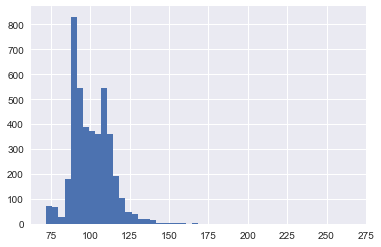

In [9]:
plt.hist(train['y'],bins=50)

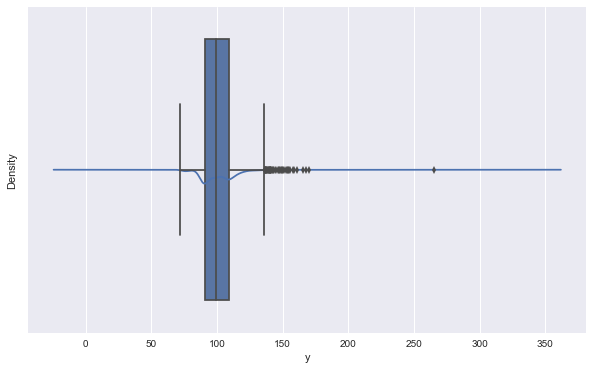

In [10]:
plt.figure(figsize = (10,6))
train["y"].plot(kind = "kde")
sns.boxplot(train["y"])

### 2. Categorical variables

Ony 8 categorical variables are found in the training data. Note there is no vaiable named 'X7'.

In [11]:
cat = train.select_dtypes(include=['object'])
cat.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


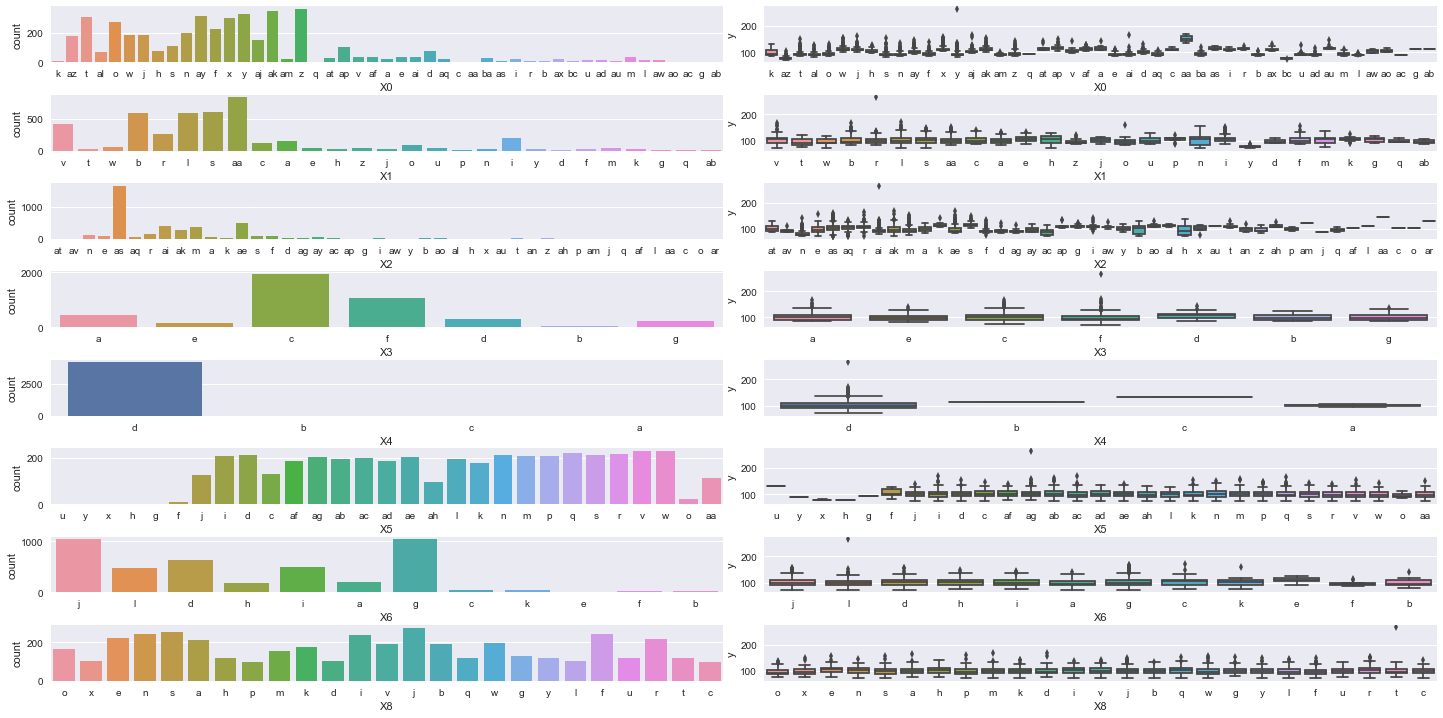

In [12]:
fig,ax = plt.subplots(8,2,figsize=(20,10))
fig.tight_layout()
for i in range(8):
    sns.countplot(cat.iloc[:,i],ax=ax[i,0])
    sns.boxplot(x=cat.iloc[:,i],y=train['y'],ax=ax[i,1])

Some variables have a lot of categories with few observations. Some quick observations: X1 - 'aa' has very few values but very high y value. If it is outlier,likely to impact the predictions. X4 - majority lies in 'd',a,b,c almost have zero counts. X8 - Relatively even distribution of both counts of each category and associated y values compared with other categorial variables. Consider dimention reduction to reduce number of groups - either based on simple rules such as group those with few observations together or use other tricks such as those in neural networks. Another possibility is to try to compare with test data distribution to identify categories of interest for small observations. Next let's move on to those indicator variables.

### 3. Indicator variables

Let us seperate indicator varibles into variables with only 0 and 1 from other variables.

In [13]:
ind_variables = train.select_dtypes(include=['int64'])

ls_indicator = []
ls_zeros = []
for i in ind_variables.columns:
    if train[i].nunique() == 2:
        ls_indicator.append(i)
    else:
        ls_zeros.append(i)
        
print('Indicator variables with only 0 and 1:',len(ls_indicator))
print('Other indicator variables:',len(ls_zeros))

Indicator variables with only 0 and 1: 356
Other indicator variables: 13


Remove variable "ID" and print out how many unique element in each "other indicator variables".

In [14]:
ls_zeros.remove('ID')

print('Number of other indicator variables', len(ls_zeros))
print()

for j in ls_zeros:
    print(j, ":", train[j].nunique())

Number of other indicator variables 12

X11 : 1
X93 : 1
X107 : 1
X233 : 1
X235 : 1
X268 : 1
X289 : 1
X290 : 1
X293 : 1
X297 : 1
X330 : 1
X347 : 1


In [15]:
summary_train = train.describe().transpose()
summary_train[summary_train['std']==0]

,count,mean,std,min,25%,50%,75%,max
X11,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X93,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X107,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X233,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X235,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X268,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X289,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X290,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X293,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X297,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The other 12 indicator variables are all just zeros. This is very suprising as wondering why it is included in the training set at all. So let us check if they have similar distribution in the testing set.

In [16]:
summary_test = test.describe().transpose()
summary_test[summary_test['std']==0]

,count,mean,std,min,25%,50%,75%,max
X257,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X258,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X295,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X296,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X369,4209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In the following, we will see that test has a different set of variables with zero standard deviation but all of them have extremely low mean values showing that there are very few positive observations. Such differences between training set and testing set suggests that we need to be very careful with those variables. On another note, this shows that the it is impossible to create a perfect similar training set and testing set. We may be able to use the differences to our advantage in creative ways or at least should be cautious about it.

In [17]:
summary_test.loc[ls_zeros]

,count,mean,std,min,25%,50%,75%,max
X11,4209.0,0.000238,0.015414,0.0,0.0,0.0,0.0,1.0
X93,4209.0,0.000475,0.021796,0.0,0.0,0.0,0.0,1.0
X107,4209.0,0.000950,0.030817,0.0,0.0,0.0,0.0,1.0
X233,4209.0,0.000238,0.015414,0.0,0.0,0.0,0.0,1.0
X235,4209.0,0.000238,0.015414,0.0,0.0,0.0,0.0,1.0
X268,4209.0,0.000238,0.015414,0.0,0.0,0.0,0.0,1.0
X289,4209.0,0.000475,0.021796,0.0,0.0,0.0,0.0,1.0
X290,4209.0,0.000238,0.015414,0.0,0.0,0.0,0.0,1.0
X293,4209.0,0.000238,0.015414,0.0,0.0,0.0,0.0,1.0
X297,4209.0,0.000238,0.015414,0.0,0.0,0.0,0.0,1.0


In [18]:
summary_train.loc[['X257','X258','X295','X296','X369']]

,count,mean,std,min,25%,50%,75%,max
X257,4209.0,0.000238,0.015414,0.0,0.0,0.0,0.0,1.0
X258,4209.0,0.002376,0.048691,0.0,0.0,0.0,0.0,1.0
X295,4209.0,0.000238,0.015414,0.0,0.0,0.0,0.0,1.0
X296,4209.0,0.000238,0.015414,0.0,0.0,0.0,0.0,1.0
X369,4209.0,0.000475,0.021796,0.0,0.0,0.0,0.0,1.0


### 4. Corrlations

Let us see the distribution between indicator variables.

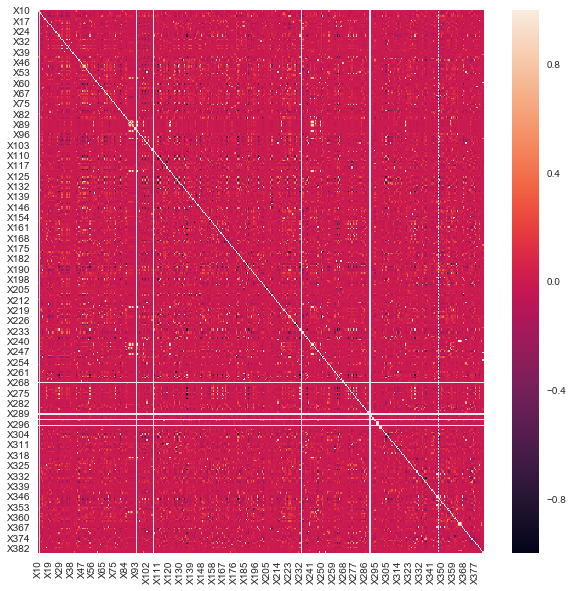

In [19]:
ind = train.select_dtypes(include=['int64']).drop('ID',axis=1)
col = np.array(ind.columns[ind.std()==0])

plt.figure(figsize=(10,10))
sns.heatmap(ind.corr())

Next let's see the distribution of each of the 'indicator variables' and how they are correlated with y.

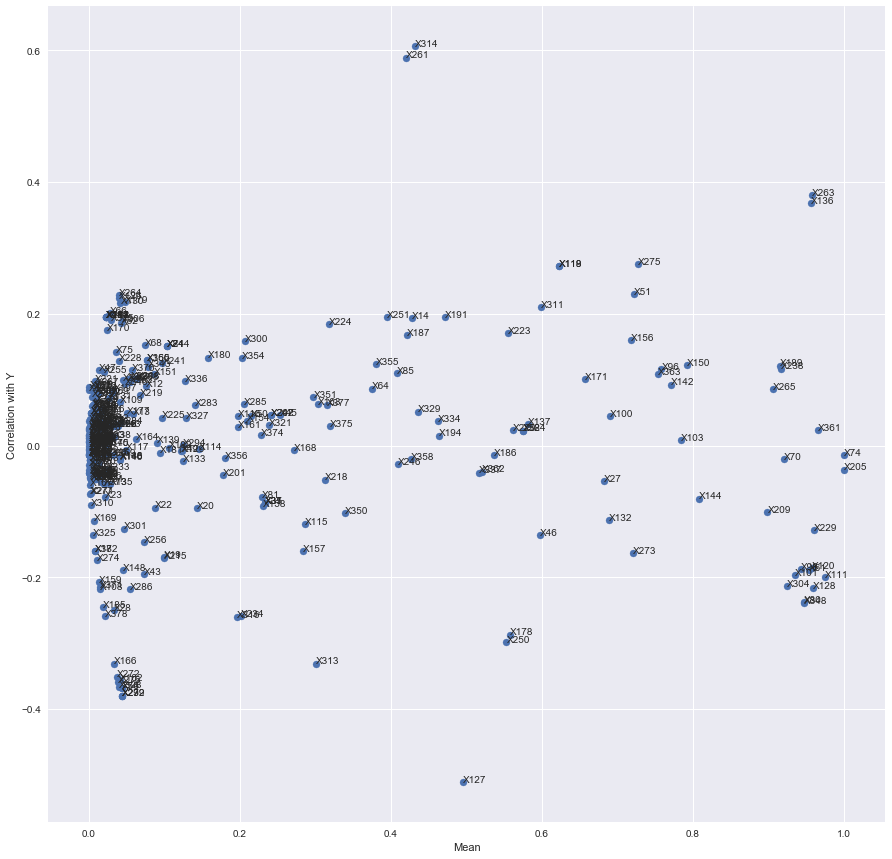

In [20]:
ind = ind.drop(col,axis=1)

def myfunction(x):
    return np.corrcoef(x,train['y'])[0,1]
y_corr = ind.apply(myfunction,axis=0)
x_mean = ind.apply(np.mean,axis=0)
n = np.array(y_corr.index)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
plt.scatter(x_mean,y_corr)
for i, txt in enumerate(n):
    ax.annotate(txt, (x_mean[i],y_corr[i]),fontsize=10)
plt.xlabel('Mean')
plt.ylabel('Correlation with Y')

Intuitively, an indicator variable is potentially very helpful in predicting if it has certain variance and is highly associated with the outcome variable. Say if we narrow the mean to between 0.2 and 0.8 (we don't want too many 0s or 1s) and correlation to be above 0.2 or below -0.2 (significant positive or negative correlation), we find the following variables to be very interesting: X314,X261,X118,X275,X51,X311,X178,X250,X313,X127. We could potentially create interaction terms between them.

## Dimentional Reduction

### 1. Use PCA to reduce the dimentions 

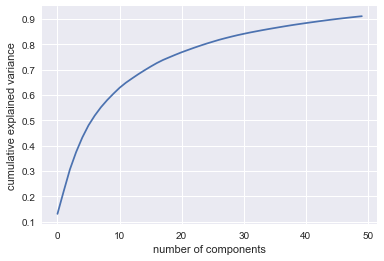

In [21]:
from sklearn.decomposition import PCA
import bisect
pca = PCA().fit(ind)
plt.plot(np.cumsum(pca.explained_variance_ratio_)[0:50])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

It seems that 20-50 components could explain around 80% to 90% of the variance, which is quite a bit reduction, 10%-20% of the original 368 variables. 

In [22]:
threshold = 0.9

pca_1 = PCA(whiten=True)
pca_1.fit(ind)

varexp = pca_1.explained_variance_ratio_.cumsum()
cutoff = bisect.bisect(varexp, threshold)

print('cutoff number:',cutoff)
print(pca_1.explained_variance_ratio_.cumsum()[:cutoff+1])

pca_2 = PCA(n_components=cutoff,whiten=True)
pca_2 = pca_2.fit(ind)
x_pca = pca_2.transform(ind)

cutoff number: 46
[ 0.13075463  0.21971367  0.30580175  0.37428331  0.43203554  0.48006796
  0.5184583   0.55141622  0.57952457  0.60461799  0.62816711  0.64791337
  0.66494633  0.68153607  0.69699827  0.71179846  0.72575126  0.73795751
  0.74836377  0.75858506  0.76837593  0.7772823   0.7861335   0.79443834
  0.80247009  0.80990519  0.81723731  0.82375551  0.82993833  0.83578487
  0.84110394  0.84619621  0.85091465  0.8555379   0.85994767  0.86416346
  0.86831454  0.87236337  0.87626874  0.87987844  0.88343279  0.88686647
  0.89024836  0.89348637  0.89665206  0.89965024  0.90249845]


### 2. Use ICA to reduce the dimentions 

Independent component analysis ([ICA][ICA]) separates a multivariate signal into additive subcomponents that are maximally independent. It is implemented in scikit-learn using the Fast ICA algorithm. Typically, ICA is not used for reducing dimensionality but for separating superimposed signals. Since the ICA model does not include a noise term, for the model to be correct, whitening must be applied. This can be done internally using the whiten argument or manually using one of the PCA variants.

[ICA]:http://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html

In [23]:
from sklearn.decomposition import FastICA
from sklearn.preprocessing import LabelEncoder

train_ica = pd.read_csv('datasets/train.csv')
test_ica = pd.read_csv('datasets/test.csv')

# process columns, apply LabelEncoder to categorical features
for c in train_ica.columns:
    if train_ica[c].dtype == 'object':
        lbl = LabelEncoder() 
        lbl.fit(list(train_ica[c].values) + list(test_ica[c].values)) 
        train_ica[c] = lbl.transform(list(train_ica[c].values))
        test_ica[c] = lbl.transform(list(test_ica[c].values))

n_comp = 10

ica = FastICA(n_components=n_comp, random_state=42)
ica2_results_train = ica.fit_transform(train_ica.drop(["y"], axis=1))
ica2_results_test = ica.transform(test_ica)

### 3. Use TSNE to see any of the variables form clusters

T-distributed stochastic neighbor embedding ([t-SNE][t-SNE]) is an algorithm for dimensionality reduction that is well-suited to visualizing high-dimensional data. The idea is to embed high-dimensional points in low dimensions in a way that respects similarities between points. Nearby points in the high-dimensional space correspond to nearby embedded low-dimensional points, and distant points in high-dimensional space correspond to distant embedded low-dimensional points. (Generally, it is impossible to match distances exactly between high-dimensional and low-dimensional spaces.) The tsne function creates a set of low-dimensional points from high-dimensional data. Typically, you visualize the low-dimensional points to see natural clusters in the original high-dimensional data.

[t-SNE]:https://distill.pub/2016/misread-tsne/

In [24]:
from sklearn.manifold import TSNE

n_sne = len(x_pca)
tsne = TSNE(n_components=2,verbose=1,perplexity=20,n_iter=300)
tsne_results = tsne.fit_transform(x_pca)

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 4209 samples in 0.051s...
[t-SNE] Computed neighbors for 4209 samples in 1.266s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4209
[t-SNE] Computed conditional probabilities for sample 2000 / 4209
[t-SNE] Computed conditional probabilities for sample 3000 / 4209
[t-SNE] Computed conditional probabilities for sample 4000 / 4209
[t-SNE] Computed conditional probabilities for sample 4209 / 4209
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.871384
[t-SNE] Error after 300 iterations: 1.713366


Nothing particular interesting other than there is a cluster with y less than 100. Maybe further tuning the variable could shed more insights. T-SNE components could be used as variables as well for initial variable selection

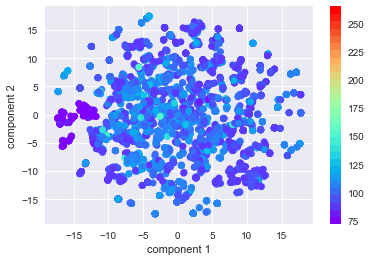

In [25]:
plt.scatter(tsne_results[:,0],tsne_results[:,1],c=train['y'],edgecolor='None',cmap=plt.cm.get_cmap('rainbow',30))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

## Model Building

### 1. Data preprocess

In [26]:
# First, let me clean up the house a bit - simple one hot encoding for categorical variables

cat = train.select_dtypes(['object'])
cat_one_hot = pd.get_dummies(cat)

print('cat.shape:', cat.shape)
print('cat_one_hot.shape:', cat_one_hot.shape)

cat_one_hot.head()

cat.shape: (4209, 8)
cat_one_hot.shape: (4209, 195)


,X0_a,X0_aa,X0_ab,X0_ac,X0_ad,X0_af,X0_ai,X0_aj,X0_ak,X0_al,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We created 195 indicator variables out of 8 categorical variables. Needless to say, this is a lot and will likely cause problems as we only have 4209 observations for training! As discussed previously, some of them have very few observations and could potentially be dropped/re-grouped. Right now let me see what the original variables without any feature engineering could give me.

In [27]:
train_le = pd.get_dummies(train).drop('ID',axis=1)
test_le = pd.get_dummies(test).drop('ID',axis=1)

print('train_le.shape:', train_le.shape)
print('test_le.shape:', test_le.shape)

train_le.shape: (4209, 564)
test_le.shape: (4209, 569)


Interestingly, training set and testing set have different shapes, 564 vs. 569. Let's find out why.

In [28]:
train_le.columns.values[~train_le.columns.isin(test_le.columns.values)]

array(['y', 'X0_aa', 'X0_ab', 'X0_ac', 'X0_q', 'X2_aa', 'X2_ar', 'X2_c',
       'X2_l', 'X2_o', 'X5_u'], dtype=object)

In [29]:
test_le.columns.values[~test_le.columns.isin(train_le.columns.values)]

array(['X0_ae', 'X0_ag', 'X0_an', 'X0_av', 'X0_bb', 'X0_p', 'X2_ab',
       'X2_ad', 'X2_aj', 'X2_ax', 'X2_u', 'X2_w', 'X5_a', 'X5_b', 'X5_t',
       'X5_z'], dtype=object)

So it appears that those categories with very few observations causes the problem. A simple but maybe naive way is to delete those variables from both. We may look again later in future to see if there is anything we could exploit here.

In [30]:
x_train = train_le[train_le.columns.values[train_le.columns.isin(test_le.columns.values)]]
x_test  = test_le[test_le.columns.values[test_le.columns.isin(train_le.columns.values)]]
y_train = train['y']
y_mean = np.mean(y_train)

print('x_train.shape:', x_train.shape)
print('y_train.shape', y_train.shape)

x_train.shape: (4209, 553)
y_train.shape (4209,)


So now we have 553 indicator variables and 1 outcome variable of float type. 

### 2. XGBoost regresssor

With some many columns and comparably few observations, algorithms with ability to select variables automatically should be considered first. Let's try XGBoost model.

In [31]:
import xgboost as xgb
from sklearn import model_selection
from sklearn.metrics import r2_score

In [32]:
# form DMatrices for Xgboost training
dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test)

In [33]:
import time
start_time = time.time()

xgb_params = {
    'n_trees': 500, 
    'eta': 0.005,
    'max_depth': 4,
    'subsample': 0.95,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': y_mean, # base prediction = mean(target)
    'silent': 1
    }

cv_result = xgb.cv(xgb_params, 
                   dtrain, 
                   num_boost_round=2000,
                   early_stopping_rounds=50,
                   verbose_eval=50, 
                   show_stdv=False
                  )

num_boost_rounds = len(cv_result)

print("n_estimators:", num_boost_rounds)
print('---------------')
print("predict time:{}s".format(round((time.time()-start_time), 3) ))

[0]	train-rmse:12.6402	test-rmse:12.6383
[50]	train-rmse:11.1074	test-rmse:11.1485
[100]	train-rmse:10.0512	test-rmse:10.1429
[150]	train-rmse:9.34061	test-rmse:9.48603
[200]	train-rmse:8.86928	test-rmse:9.0659
[250]	train-rmse:8.55877	test-rmse:8.79995
[300]	train-rmse:8.35348	test-rmse:8.63412
[350]	train-rmse:8.21538	test-rmse:8.5315
[400]	train-rmse:8.11796	test-rmse:8.46819
[450]	train-rmse:8.03919	test-rmse:8.43074
[500]	train-rmse:7.97411	test-rmse:8.40868
[550]	train-rmse:7.91075	test-rmse:8.3988
[600]	train-rmse:7.85066	test-rmse:8.39101
[650]	train-rmse:7.79273	test-rmse:8.38592
[700]	train-rmse:7.73426	test-rmse:8.38472
[750]	train-rmse:7.67602	test-rmse:8.3843
n_estimators: 732
---------------
predict time:77.305s


In [34]:
# train model
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)

In [35]:
# check r2-score (to get higher score)
# r-squared = explained variation / total variation
print(r2_score(dtrain.get_label(), model.predict(dtrain)))

0.615369830515


In [36]:
# make predictions and save results
y_pred = model.predict(dtest)
output = pd.DataFrame({'id': test['ID'].astype(np.int32), 'y': y_pred})
output.head()

,id,y
0,1,81.491211
1,2,102.416321
2,3,81.109451
3,4,78.922157
4,5,112.273010


### 3. Feature importance

In [37]:
model = xgb.XGBRegressor(max_depth=4,learning_rate=0.005,n_estimators=num_boost_rounds,
                         subsample=0.95, objective='reg:linear')
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.005, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=732,
       n_jobs=1, nthread=1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.95)

In [38]:
feat_names = x_train.columns.values
feat_imp = model.feature_importances_

imp_map = pd.Series(feat_imp,index=feat_names)
imp_map.sort_values(ascending=False,inplace=True)

top30 = pd.Series(imp_map[0:30]).reset_index()
top30.columns = ['Variable','Importance']

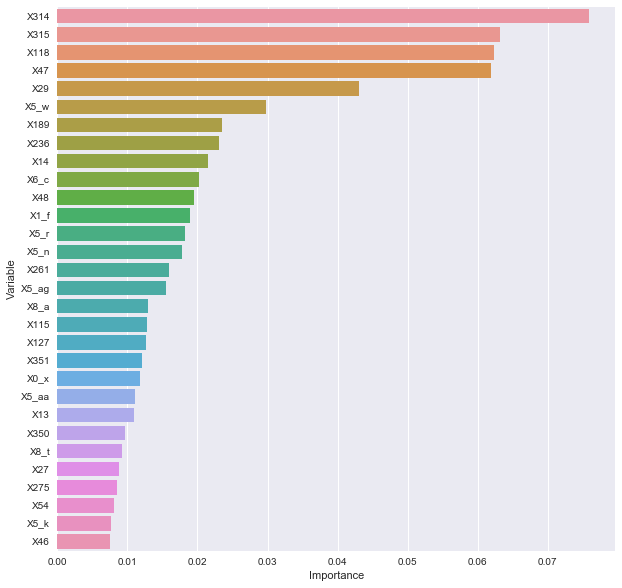

In [39]:
plt.figure(figsize=(10,10))
sns.barplot(top30['Importance'],top30['Variable'])
plt.xlabel('Importance')